In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def make_random_data(x_min, x_max, a, b, c, noise_range):
    x = np.arange(x_min, x_max, 0.1)
    y = a * x**2 + b * x + c

    y_noise = y + np.random.randn(len(x)) * 100
    y_noise[1000:1250] = y_noise[1000:1250] + np.random.randn(250) * 500

    return x, y, y_noise


def quadratic_from_three_points(x1, y1, x2, y2, x3, y3):

    A = np.array([[x1**2, x1, 1], [x2**2, x2, 1], [x3**2, x3, 1]])
    b = np.array([y1, y2, y3])
    x = np.linalg.solve(A, b)

    a = x[0]
    b = x[1]
    c = x[2]

    return a, b, c


def plot_data(x, y, y_noise, model):

    if model is not None:
        y_pred = model[0] * x**2 + model[1] * x + model[2]
        plt.plot(x, y_pred, label="Predicted Data", linestyle="--", color="red")

    plt.plot(x, y, label="Origin Data", color="orange")
    plt.scatter(x, y_noise, label="Real Data", s=1)

    plt.grid(True)
    plt.legend()
    plt.show()


def ransac(x, y, n, k, t, d):
    best_error = np.inf
    best_model = None
    best_inliers = None

    for i in range(n):
        sample = np.random.choice(len(x), k, replace=False)
        x_sample = x[sample]
        y_sample = y[sample]

        a, b, c = quadratic_from_three_points(
            x_sample[0], y_sample[0], x_sample[1], y_sample[1], x_sample[2], y_sample[2]
        )

        y_pred = a * x + b * x + c
        error = np.abs(y - y_pred)

        inliers = np.where(error < t)[0]
        if len(inliers) > d:
            error = np.sum(error[inliers])
            if error < best_error:
                best_error = error
                best_model = (a, b, c)
                best_inliers = inliers

    return best_model, best_inliers

[ 0] Best Model: (-0.5618481551895409, -22.065397473218244, 116.25189444455472)


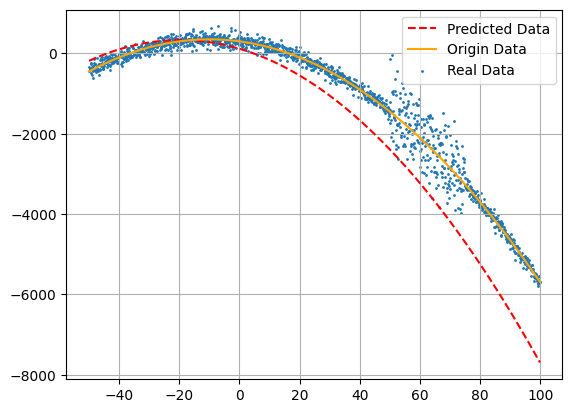

[ 1] Best Model: (-0.6967305877562097, -23.858901489481244, 134.82655132620934)


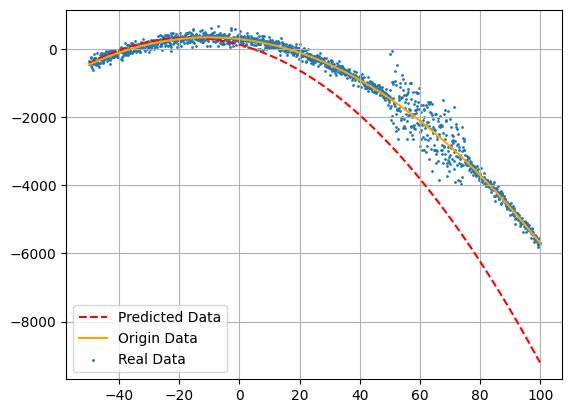

[ 2] Best Model: (-0.7606491053349915, -22.412358301244815, 132.80055320840597)


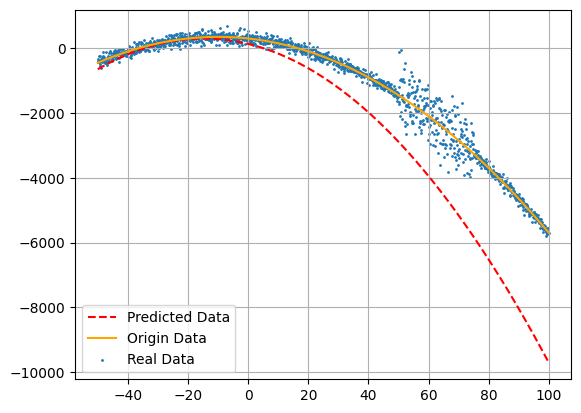

[ 3] Best Model: (-0.3171984215423734, -22.735255518084063, 115.8116378745866)


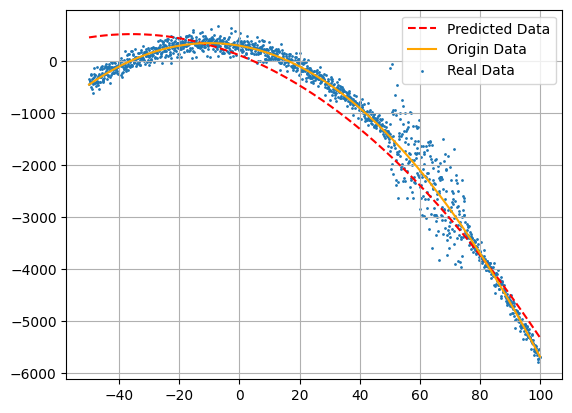

[ 4] Best Model: (-0.6899174846813264, -22.49245419237501, 123.03707565976919)


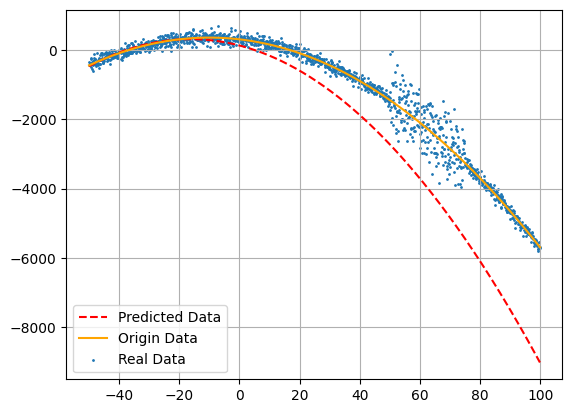

[ 5] Best Model: (-0.03698806282477646, -23.061147201451824, 127.30483616426437)


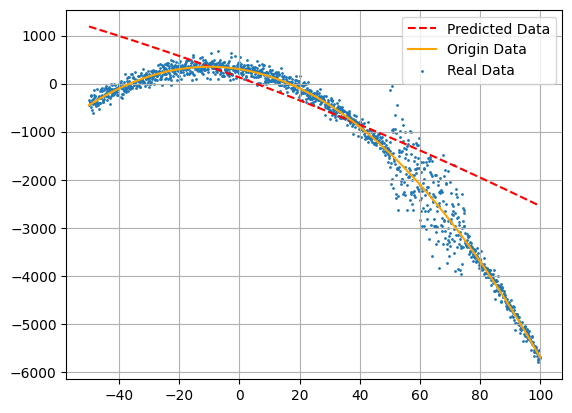

[ 6] Best Model: (-0.3496069263277109, -22.698835733038052, 115.86642716809395)


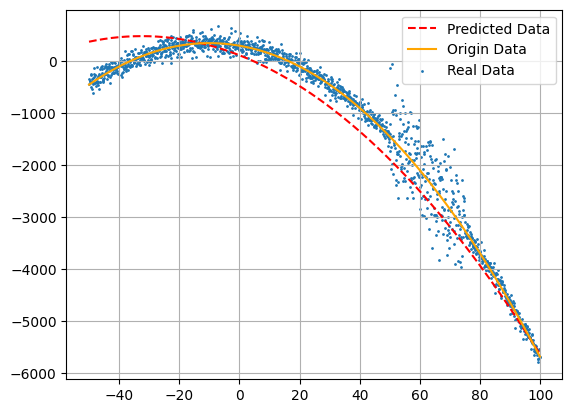

[ 7] Best Model: (-0.3588601519169039, -21.08224889605334, 118.03215651574794)


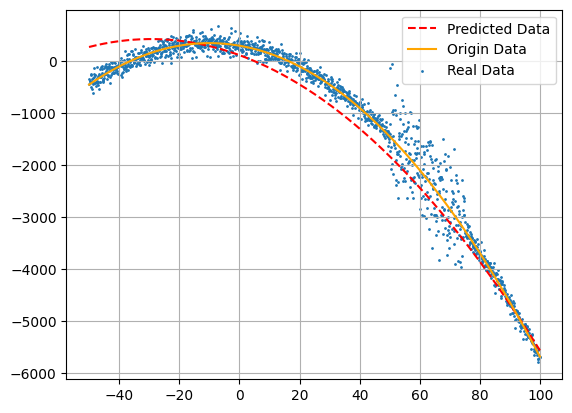

[ 8] Best Model: (-0.3325867777272048, -22.790644751560738, 115.53052869303424)


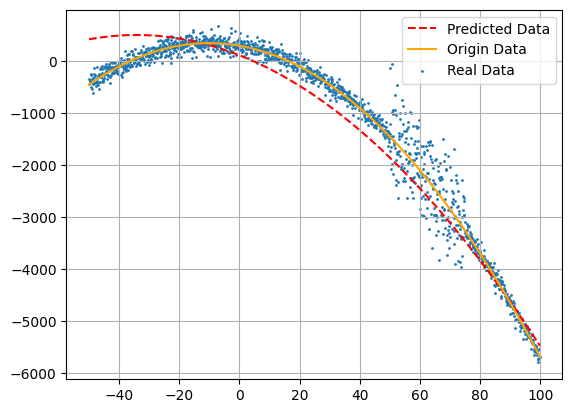

[ 9] Best Model: (-0.6526085457757504, -22.407734585823476, 120.03506002091926)


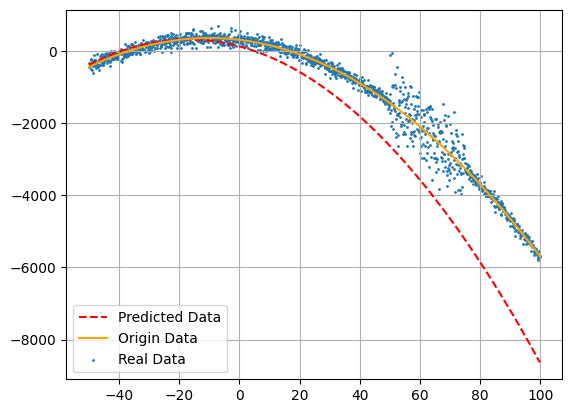

In [3]:
x, y, y_noise = make_random_data(-50, 100, -0.5, -10, 300, 100)
for i in range(10):
    best_model, best_inliers = ransac(x, y_noise, 20000, 3, 1000, 1000)
    print(f"[{i:2d}] Best Model: {best_model}")
    plot_data(x, y, y_noise, best_model)